<a href="https://colab.research.google.com/github/SiracencoSerghei/DataScienceHW/blob/main/HW9/HW9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization, LeakyReLU
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

---
# Завантажуємо датасет
---

In [23]:
# Завантаження датасету Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Нормалізація пікселів (0-255 -> 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0




In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
# Список назв класів
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# Виведення назви класу для першого зображення
index = 0  # Індекс зображення
print(f"Мітка: {y_train[index]}, Назва класу: {class_names[y_train[index]]}")

Мітка: 9, Назва класу: Ankle boot


---
# Візуалізуємо зображення з нашого датасету:
---

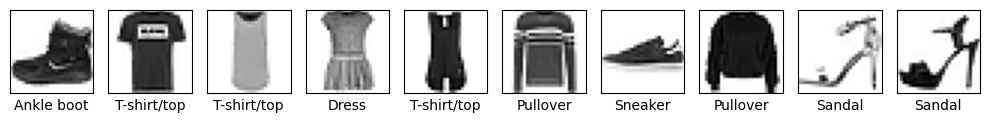

In [4]:
plt.figure(figsize=(10,10))
# Цикл для відображення перших 10 зображень
for i in range(10):
    plt.subplot(1, 10, i+1)

    # Видалення осей (ticks) для кращої візуалізації
    plt.xticks([])
    plt.yticks([])

    # Відображення зображення у градаціях сірого (чорно-білий режим)
    plt.imshow(x_train[i], cmap=plt.cm.binary)

    # Додавання підпису з назвою класу під зображенням
    plt.xlabel(class_names[y_train[i]])

# Показ всіх створених графіків
plt.tight_layout()  # Автоматичне регулювання відступів
plt.show()

In [5]:
# Функція створення моделі
def create_model(num_layers, num_neurons, activation, optimizer, reg):
    model = Sequential([Flatten(input_shape=(28, 28))])  # Вхідний шар

    for _ in range(num_layers):  # Додаємо приховані шари
        model.add(Dense(num_neurons, activation=activation))
        if reg == 'batchnorm':
            model.add(BatchNormalization())  # Batch Normalization
        elif reg == 'dropout':
            model.add(Dropout(0.3))  # Dropout з 30% виключених нейронів

    model.add(Dense(10, activation='softmax'))  # Вихідний шар
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Колбеки
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)


In [ ]:
# Список експериментів
experiments = [
    {
        'num_layers': 3,
        'num_neurons': 512,
        'activation': 'relu',
        'optimizer': Adam(learning_rate=0.001),
        'reg': 'batchnorm'
    },
    {
        'num_layers': 2,
        'num_neurons': 256,
        'activation': 'tanh',
        'optimizer': SGD(learning_rate=0.01),
        'reg': 'dropout'
    }
]

# Цикл для двох експериментів
results = []
for exp in experiments:
    print(f"Навчання моделі: Layers={exp['num_layers']}, Neurons={exp['num_neurons']}, "
          f"Act={exp['activation']}, Opt={exp['optimizer']}, Reg={exp['reg']}")

    # Створення моделі
    model = create_model(exp['num_layers'], exp['num_neurons'], exp['activation'], exp['optimizer'], exp['reg'])

    # Навчання моделі
    history = model.fit(
        x_train, y_train,
        epochs=50,
        batch_size=32,
        validation_data=(x_test, y_test),
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    # Збереження результатів
    max_acc = max(history.history['val_accuracy'])
    results.append([exp['num_layers'], exp['num_neurons'], exp['activation'], str(exp['optimizer']), exp['reg'], max_acc])

    # Збереження даних для графіку Bias-Variance
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(1, len(train_loss) + 1)

# Виведення результатів
print(results_df)


Навчання моделі: Layers=3, Neurons=512, Act=relu, Opt=<keras.src.optimizers.adam.Adam object at 0x7f10ddc28d90>, Reg=batchnorm
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 262s 139ms/step - accuracy: 0.7904 - loss: 0.6103 - val_accuracy: 0.7988 - val_loss: 0.5406 - learning_rate: 0.0010
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 268s 143ms/step - accuracy: 0.8456 - loss: 0.4229 - val_accuracy: 0.8082 - val_loss: 0.5494 - learning_rate: 0.0010
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 262s 140ms/step - accuracy: 0.8622 - loss: 0.3752 - val_accuracy: 0.8470 - val_loss: 0.4259 - learning_rate: 0.0010
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 317s 137ms/step - accuracy: 0.8763 - loss: 0.3362 - val_accuracy: 0.8608 - val_loss: 0.3963 - learning_rate: 0.0010
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 266s 142ms/step - accuracy: 0.8815 - loss: 0.3196 - val_accuracy: 0.8613 - val_loss: 0.4000 - learning_rate: 0.0010
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 317s 139ms/step - accuracy: 0.8858 - loss

### Перша модель (3 шари, 512 нейронів, активація ReLU, оптимізатор Adam, регуляризація BatchNorm):

- **Точність** зростає з **79%** на початку до **93%** на 20-й епосі.
- **Лос** після 20-ти епох зменшується з **0.61** до **0.18**.
- **Точність на валідаційних даних** поступово зростає, досягаючи **88%** на 20-й епосі.

### Друга модель (2 шари, 256 нейронів, активація tanh, оптимізатор SGD, регуляризація Dropout):

- **Точність** зростає з **66%** на початку до **86%** на 20-й епосі.
- **Лос** після 20-ти епох зменшується з **0.95** до **0.38**.
- **Точність на валідаційних даних** зростає до **85%** на 20-й епосі.

---

### Порівняння:

- **Перша модель** показує значно кращі результати щодо **точності** та **зниження лосу** порівняно з другою моделлю.
- **Архітектура першої моделі** (3 шари та 512 нейронів) є складнішою, що, ймовірно, дозволяє їй краще справлятися з класифікацією.
- **Друга модель** використовує менше нейронів та інший оптимізатор (SGD замість Adam), що обмежує її здатність досягати високих результатів.

---

### Висновок:

**Перша модель** є більш ефективною для цієї задачі.


In [28]:
input_layer = Input(shape=(28, 28))

# Створення моделі
x = Flatten()(input_layer)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)

x = Dense(64)(x)
x = LeakyReLU(negative_slope=0.1)(x)

output_layer = Dense(10, activation='softmax')(x)

# Створення моделі за допомогою функціонального API
model = Model(inputs=input_layer, outputs=output_layer)

# Компіляція моделі
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Колбеки для покращення навчання
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
]

# Навчання моделі
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=50, batch_size=32,
    callbacks=callbacks
)

# Збереження моделі
model.save(f"model_improved.keras")

# Отримання максимального значення точності на валідаційних даних
max_acc = max(history.history['val_accuracy'])

# Створення DataFrame для результатів
results_df = pd.DataFrame([[max_acc]], columns=['Accuracy'])

# Виведення результатів
print(results_df)


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7353 - loss: 0.7437 - val_accuracy: 0.8237 - val_loss: 0.4641 - learning_rate: 0.0010
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8213 - loss: 0.4925 - val_accuracy: 0.8453 - val_loss: 0.4193 - learning_rate: 0.0010
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8334 - loss: 0.4596 - val_accuracy: 0.8387 - val_loss: 0.4364 - learning_rate: 0.0010
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8385 - loss: 0.4437 - val_accuracy: 0.8519 - val_loss: 0.3965 - learning_rate: 0.0010
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8429 - loss: 0.4337 - val_accuracy: 0.8522 - val_loss: 0.4056 - learning_rate: 0.0010
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8468 - loss: 0.4186 - val_accuracy: 0.8591 - val_loss: 0.3945 - learning_rate: 0.0010
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8

### Результати тренування моделі

- **Фінальна точність на тренувальних даних:** 88,46%
- **Фінальна точність на валідаційних даних:** 88,45%

Точність стабільно покращувалася, з незначними коливаннями. В кінці навчання швидкість навчання була знижена, що могло допомогти стабілізувати точність на валідації.

### Висновки

Здається, що модель досягла точки стабілізації, і далі не спостерігається значних покращень після 36-го етапу.


### Результати тренування моделей

#### Перша модель (3 шари, 512 нейронів, активація ReLU, оптимізатор Adam, регуляризація BatchNorm):
- **Точність на тренувальних даних:** зростає з 79% на початку до 93% на 20-й епосі.
- **Лос на тренувальних даних:** зменшується з 0.61 до 0.18.
- **Точність на валідаційних даних:** поступово зростає, досягаючи 88% на 20-й епосі.
- **Час тренування:** більше 2 годин.

#### Друга модель (2 шари, 256 нейронів, активація tanh, оптимізатор SGD, регуляризація Dropout):
- **Точність на тренувальних даних:** зростає з 66% на початку до 86% на 20-й епосі.
- **Лос на тренувальних даних:** зменшується з 0.95 до 0.38.
- **Точність на валідаційних даних:** зростає до 85% на 20-й епосі.
- **Час тренування:** більше 1 години.

#### Третя модель:
- **Фінальна точність на тренувальних даних:** 88,46%.
- **Фінальна точність на валідаційних даних:** 88,45%.
- **Точність стабільно покращувалася** з незначними коливаннями.
- **Швидкість навчання** була знижена в кінці, що могло допомогти стабілізувати точність на валідації.
- **Час тренування:** всього 10 хвилин.

### Порівняння:

- Перша модель показує значно кращі результати щодо точності та зниження лосу порівняно з іншими моделями.
- **Час тренування** першої моделі значно довший (більше 2 годин), в порівнянні з другою моделлю (1 година) та третьою моделлю (10 хвилин).
- **Архітектура** першої моделі (3 шари та 512 нейронів) є складнішою, що дозволяє їй досягати вищих результатів.
- Друга модель використовує менше нейронів і інший оптимізатор (SGD замість Adam), що обмежує її здатність досягати високих результатів.
- Третя модель, хоча й показує стабільні результати на тренувальних та валідаційних даних, займає значно менше часу на навчання, що може бути важливим фактором для практичних застосувань.

### Висновок:
Перша модель є більш ефективною для цієї задачі з точки зору точності, але її час тренування значно довший. Якщо час навчання є критичним фактором, варто розглянути використання третьої моделі, оскільки вона дає схожі результати, але займає лише 10 хвилин на тренування.


In [31]:
# Оцінка моделі на тестових даних
test_loss, test_acc = model.evaluate(x_test, y_test)

# Виведення результатів
print(f"Тестова втрата: {test_loss:.4f}")
print(f"Тестова точність: {test_acc * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8865 - loss: 0.3194
Тестова втрата: 0.3228
Тестова точність: 88.43%


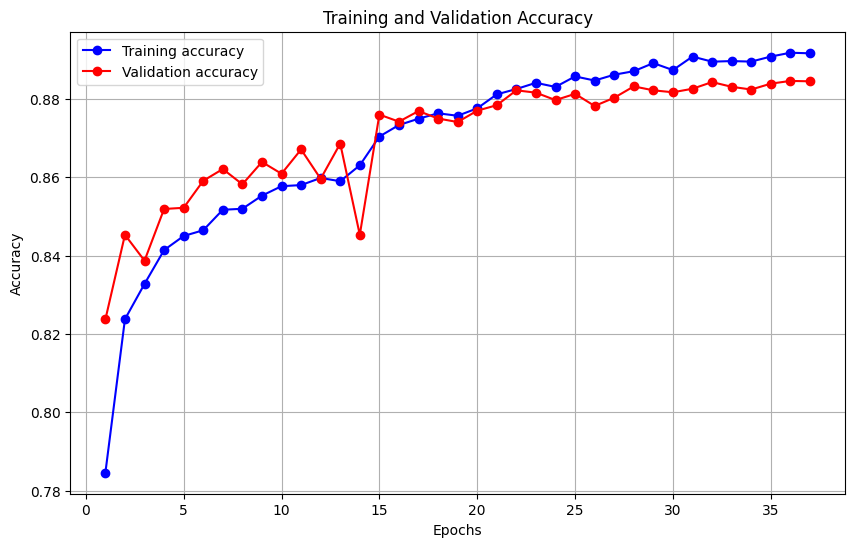

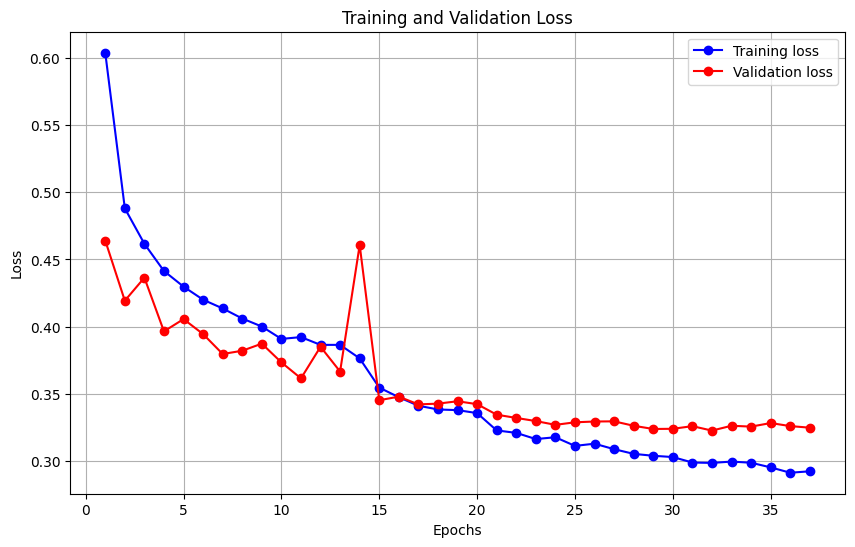

In [32]:
# Витягуємо дані про точність та втрати з історії тренування
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Створюємо список епох
epochs = range(1, len(train_acc) + 1)

# Будуємо графік точності
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Будуємо графік втрат
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


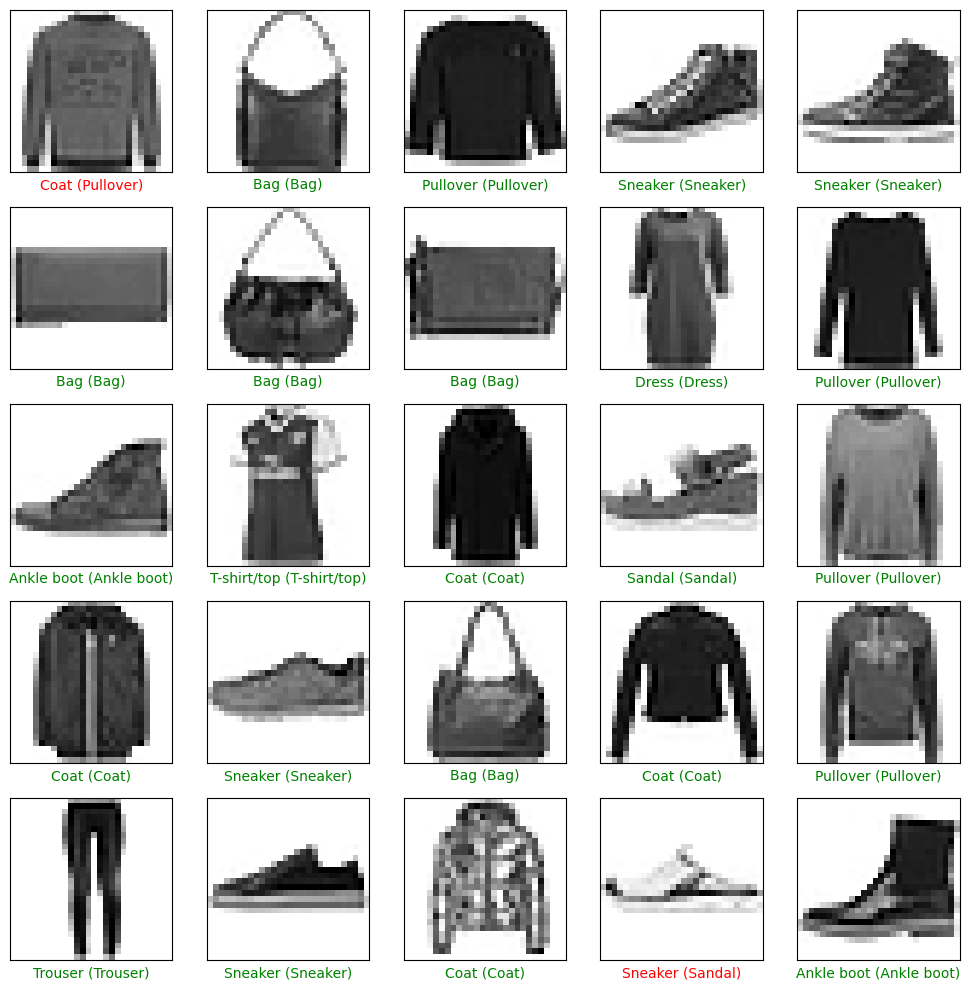

In [33]:
# Виконуємо передбачення на тестових даних
y_pred = model.predict(x_test)

# Створюємо графік для відображення 25 випадкових зображень та їх передбачень
figure = plt.figure(figsize=(10, 10))

# Вибираємо 25 випадкових зображень
for i, index in enumerate(np.random.choice(x_test.shape[0], size=25, replace=False)):
    ax = figure.add_subplot(5, 5, i + 1, xticks=[], yticks=[])

    # Відображаємо зображення
    ax.imshow(np.squeeze(x_test[index]), cmap=plt.cm.binary)

    # Передбачення для даного зображення
    predict_index = np.argmax(y_pred[index])
    true_index = y_test[index]

    # Встановлюємо підпис до зображення
    ax.set_xlabel('{} ({})'.format(class_names[predict_index],
                                  class_names[true_index]),
                                  color=('green' if predict_index == true_index else 'red'))

# Показуємо графік
plt.tight_layout()
plt.show()

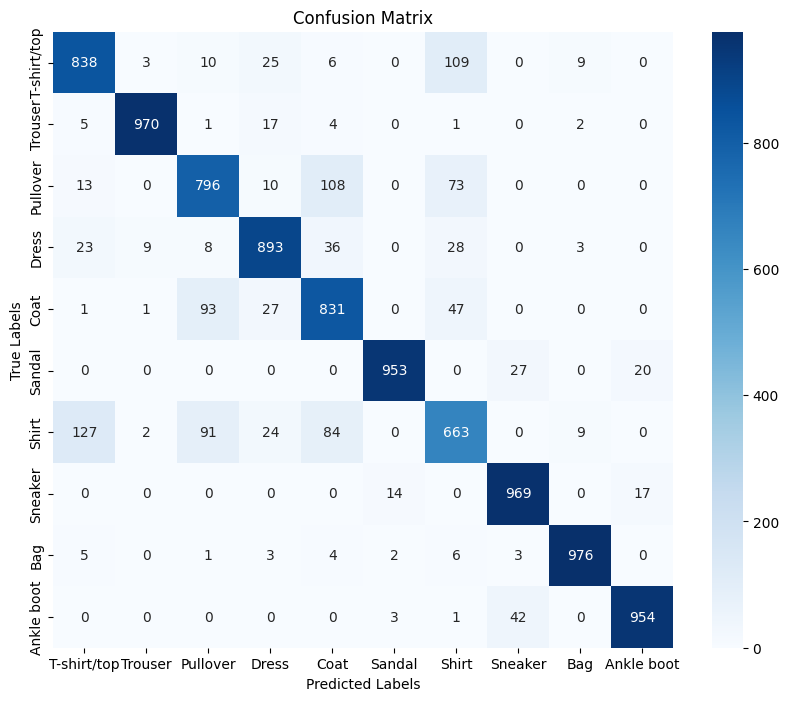

In [36]:
# Кожен елемент на перетині рядка і стовпця вказує, скільки разів зображення з певним істинним класом було класифіковано як певний передбачений клас.

predicted_labels = np.argmax(y_pred, axis=1)

# Обчислюємо матрицю плутанини
conf_matrix = confusion_matrix(y_test, predicted_labels)

# Створюємо графік для матриці плутанини
plt.figure(figsize=(10, 8))

# Візуалізуємо матрицю плутанини за допомогою теплової карти
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)

# Додаємо підписи та заголовок
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
